# Capstone 3 : Scholarship Allocation Tool


# Exploratory Data Analysis
**Evenness of awards versus eligibility in past allocations (pre allocation tool) are explored.**
<br>**Applicant financial needs and incomes are  visualized and summarized.**
<br>**Real and fabricated datasets are compared.**
____________

# Guide: Exploratory Data Analysis<a id='guide'></a>
## 1. [Import libraries and data](#import)
## 2. [Visualizations: Real applicant data](#viz_real)
<br>2a. [Eligibility versus actual awards](#scatter)
<br>2b. [Circumstantial costs experienced by households](#circumstance_bar)
<br>2c. [Household incomes and estimated financial need](#group_box)
<br>2d. [Histogram displaying participant numbers for binned disposable income ranges](#disposable)
## 3. [Visualizations: Living Wage](#viz_wage)
<br>3a. [Average household income](#income_line)
## 4. [Calculated costs table](#table_costs)
## 5. [Visualizations: Fabricated dataset](#fabricated)

__________

# 1. Import libraries and Data<a id='import'></a>

## Import libraries

In [1]:
# Import the libraries
import requests
import io

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['figure.figsize'] = [11, 8]


## Import data

In [2]:
#get living wage data from GitHub: Floydworks
#living_wage_table = pd.read_csv('/Users/sandidge/Desktop/Python_Projects/BGS/exports_imports/MIT_income_table.csv').iloc[:, 1:]
url = ('https://raw.githubusercontent.com/Floydworks/Scholarship_Allocation_Tool/main/data_files/MIT_income_table.csv')
download = requests.get(url).content
# Read the downloaded content and turn it into a pandas dataframe
living_wage_table = pd.read_csv(io.StringIO(download.decode('utf-8'))).iloc[:, 1:]

#get calculated costs from GitHub: Floydworks
#calculated_costs_table = pd.read_csv('/Users/sandidge/Desktop/Python_Projects/BGS/exports_imports/calculated_costs_table.csv').iloc[:, 1:]
url = ('https://raw.githubusercontent.com/Floydworks/Scholarship_Allocation_Tool/main/data_files/calculated_costs_table.csv')
download = requests.get(url).content
# Read the downloaded content and turn it into a pandas dataframe
calculated_costs_table = pd.read_csv(io.StringIO(download.decode('utf-8'))).iloc[:, 1:]
    
#get fabricated applicant data from GitHub: Floydworks
#fabricated_scholarship = pd.read_csv('/Users/sandidge/Desktop/Python_Projects/BGS/exports_imports/fabricated_allotments.csv').iloc[:, 1:]
url = ('https://raw.githubusercontent.com/Floydworks/Scholarship_Allocation_Tool/main/data_files/fabricated_allotments.csv')
download = requests.get(url).content
# Read the downloaded content and turn it into a pandas dataframe
fabricated_scholarship = pd.read_csv(io.StringIO(download.decode('utf-8'))).iloc[:, 1:]

#get real applicant data from GitHub: Floydworks
#real_data = pd.read_csv('/Users/sandidge/Desktop/Python_Projects/BGS/exports_imports/df_past_awards2.csv').iloc[:, 1:]
url = ('https://raw.githubusercontent.com/Floydworks/Scholarship_Allocation_Tool/main/data_files/df_past_awards2.csv')
download = requests.get(url).content
# Read the downloaded content and turn it into a pandas dataframe
real_data = pd.read_csv(io.StringIO(download.decode('utf-8'))).iloc[:, 1:]




# 2. Visualizations: Real applicant data<a id='viz_real'></a>
[Back to top](#Guide)

## clean up missing data

In [3]:
#drop rows with missing household income data
real_data = real_data.dropna()

## 2a. Award eligibility compared to actual awards<a id='scatter'></a>
**How do the past amounts awarded compare to allocations calculated by the tool?**

In [4]:
#calculate the percent tuition difference in actual award versus eligible amount according to allocation tool
real_data['award_diff'] = real_data['percent_award'] - real_data['percent_eligible']
correct_allocation = real_data[real_data['award_diff'] == 0]

#print(len(real_data))
#print(len(correct_allocation))
percent_incorrect = 100 - (len(correct_allocation)/len(real_data))*100
print(round(percent_incorrect, 2), 'percent of actual awards were for more or less than eligible amount')

#correct_allocation.head(20)
#real_data.head()

68.42 percent of actual awards were for more or less than eligible amount


In [5]:
#calculate incomes and label groups
correct = correct_allocation[['disposable_income', 'percent_award']]
correct['percent_funded'] = 'correct award'
correct = correct.rename(columns = {'percent_award':'percent_funding'})
correct['adjusted_disposable'] = correct_allocation['disposable_income']/((correct_allocation['number_adults']*.5) + correct_allocation['number_children'])

award = real_data[['disposable_income', 'percent_award']]
award['percent_funded'] = 'actual award'
award = award.rename(columns = {'percent_award':'percent_funding'})
award['adjusted_disposable'] = real_data['disposable_income']/((real_data['number_adults']*.5) + real_data['number_children'])

elig = real_data[['disposable_income', 'percent_eligible']]
elig['percent_funded'] = 'eligibile for'
elig = elig.rename(columns = {'percent_eligible':'percent_funding'})
elig['adjusted_disposable'] = real_data['disposable_income']/((real_data['number_adults']*.5) + real_data['number_children'])

award_concat1 = award.append(elig, ignore_index=True)
award_types = award_concat1.append(correct, ignore_index=True)

#award_types


/var/folders/bv/4mctz8d94zx0nlh0hjsm4x8h0000gn/T/ipykernel_79124/2125655991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct['percent_funded'] = 'correct award'
/var/folders/bv/4mctz8d94zx0nlh0hjsm4x8h0000gn/T/ipykernel_79124/2125655991.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  award['percent_funded'] = 'actual award'
/var/folders/bv/4mctz8d94zx0nlh0hjsm4x8h0000gn/T/ipykernel_79124/2125655991.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

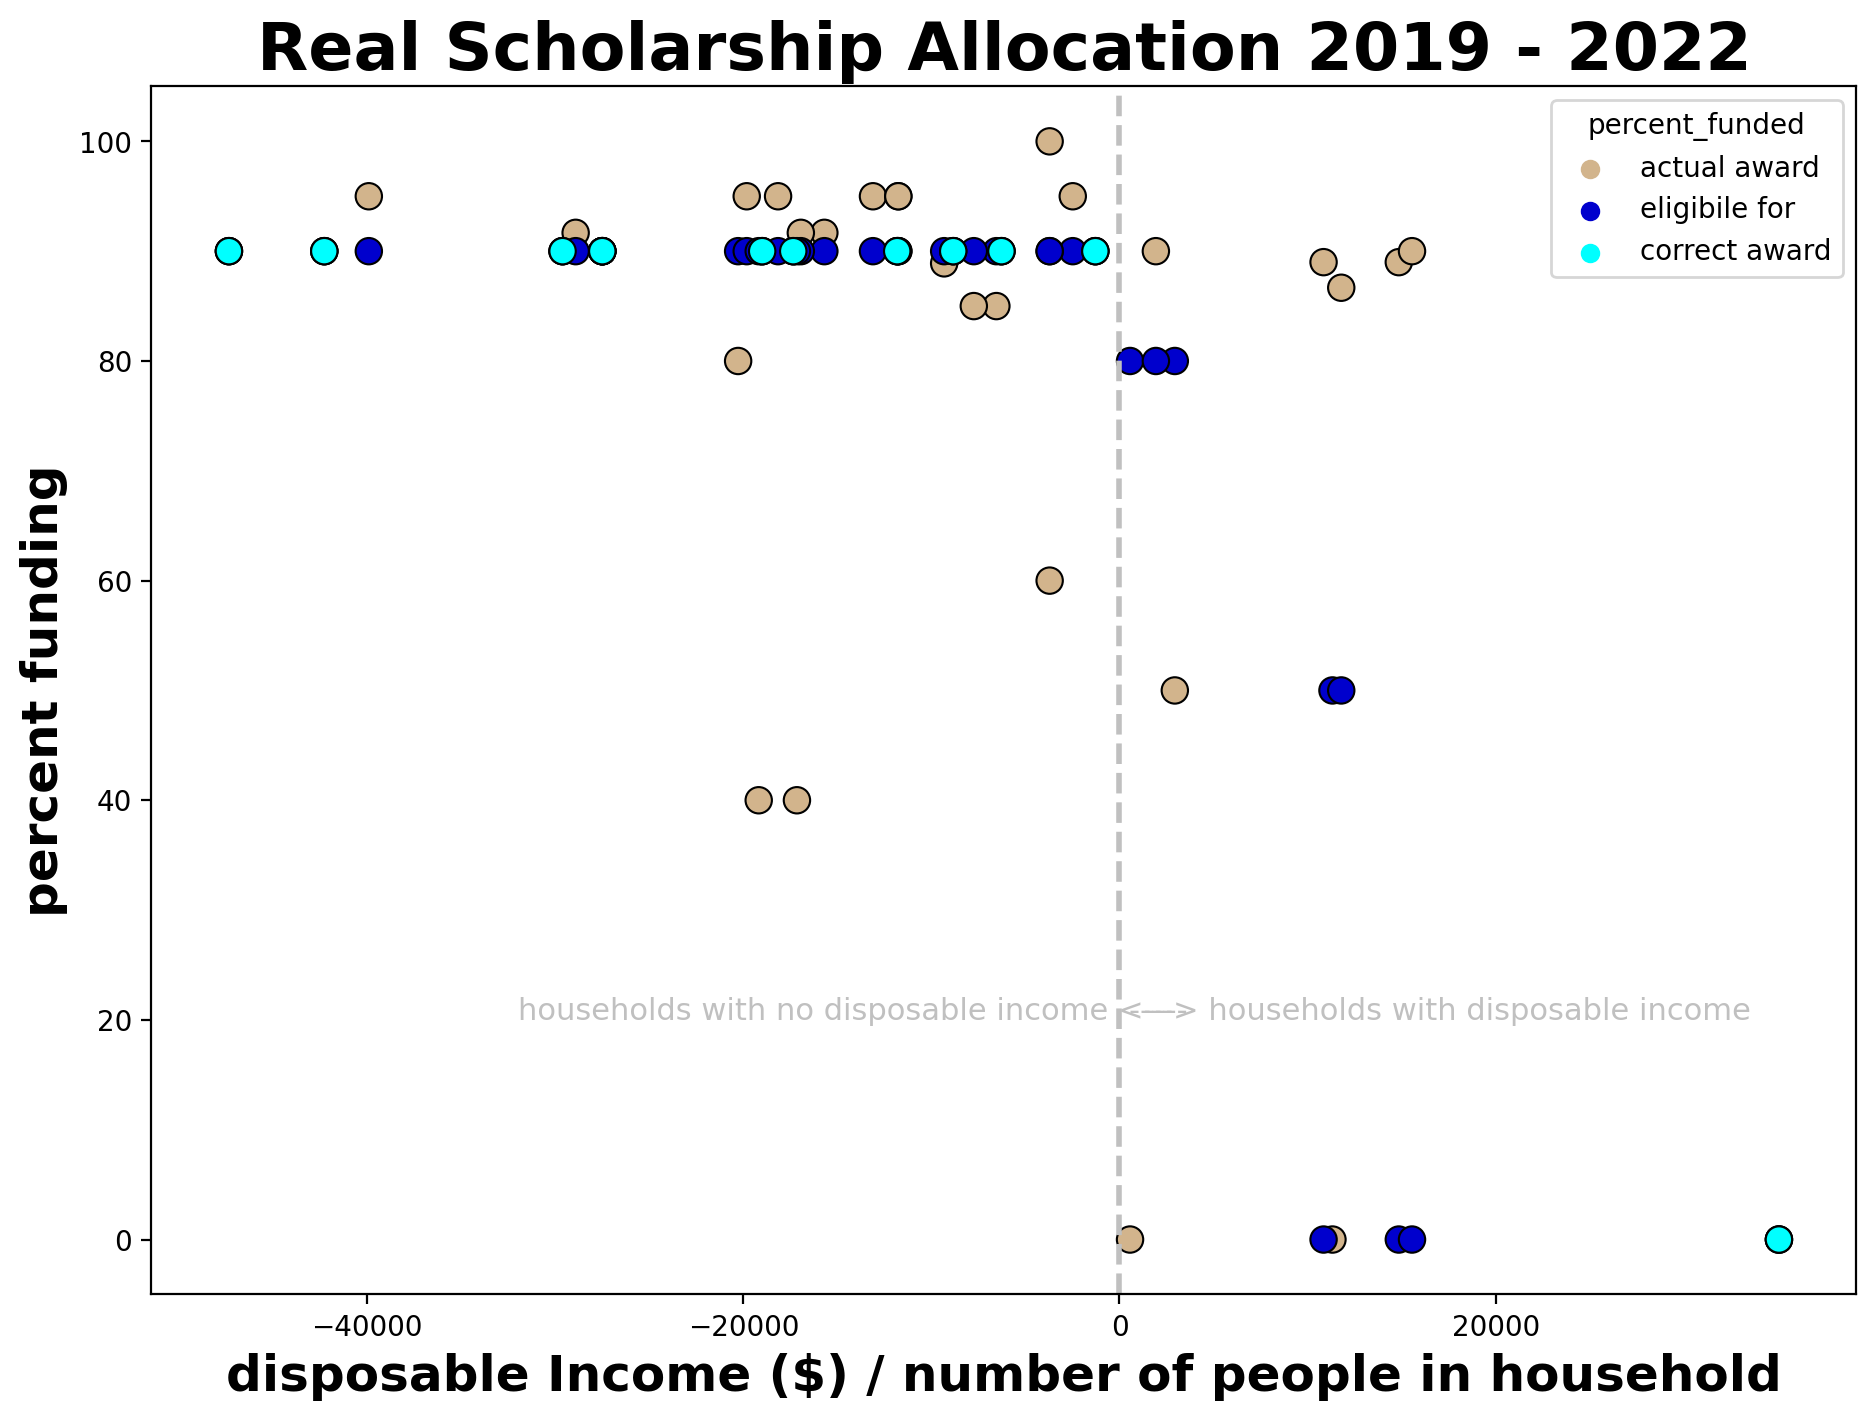

In [6]:
# lineplot of disposable income, percent eligible and percent awarded
#add this later: https://www.python-graph-gallery.com/184-lollipop-plot-with-2-groups

#define custome palette
palette = sns.color_palette(['tan', "mediumblue",'aqua'])
plt.figure(figsize=(11,8))
# draw lineplot
ax = sns.scatterplot(x="adjusted_disposable", y="percent_funding",
             hue="percent_funded",
             marker="o", palette=palette, edgecolor="black",s = 90,
             data=award_types)
#Annotations
ax.axvline(0, color='silver', linestyle='--', linewidth = 2)
#ax.axhline(90, color='lightgrey', linestyle='--')
#ax.axhline(80, color='lightgrey', linestyle='--')
#ax.axhline(50, color='lightgrey', linestyle='--')
#ax.axhline(0, color='lightgrey', linestyle='--')
plt.text(-32000, 20,'households with no disposable income <----', size = 11, color = 'silver')
plt.text(500, 20,'----> households with disposable income', size = 11, color = 'silver')

ax.set_title( "Real Scholarship Allocation 2019 - 2022" , size = 24, fontweight = 'bold')
ax.set_xlabel( "disposable Income ($) / number of people in household" , size = 18, fontweight = 'bold')
ax.set_ylabel( "percent funding" , size = 18, fontweight = 'bold')

#The plot is shown
plt.show()

**Summary**
<br>Eligibility declines once a household has disposable income. Here, the level of support will be influenced by the number of family members who are accessing the disposable income. 
<br>68.42 percent of actual awards were for more or less than eligible amount showing great unevenness in allocation.

## 2b. Circumstantial costs experienced by households<a id='circumstance_bar'></a>
**What are the most common financial circumstances participant households face?**

          Type  Sum  Proportion
0       single   22       57.89
4    education   11       28.95
6      housing   10       26.32
1   employment    6       15.79
2      divorce    3        7.89
3      medical    3        7.89
5  immigration    0        0.00


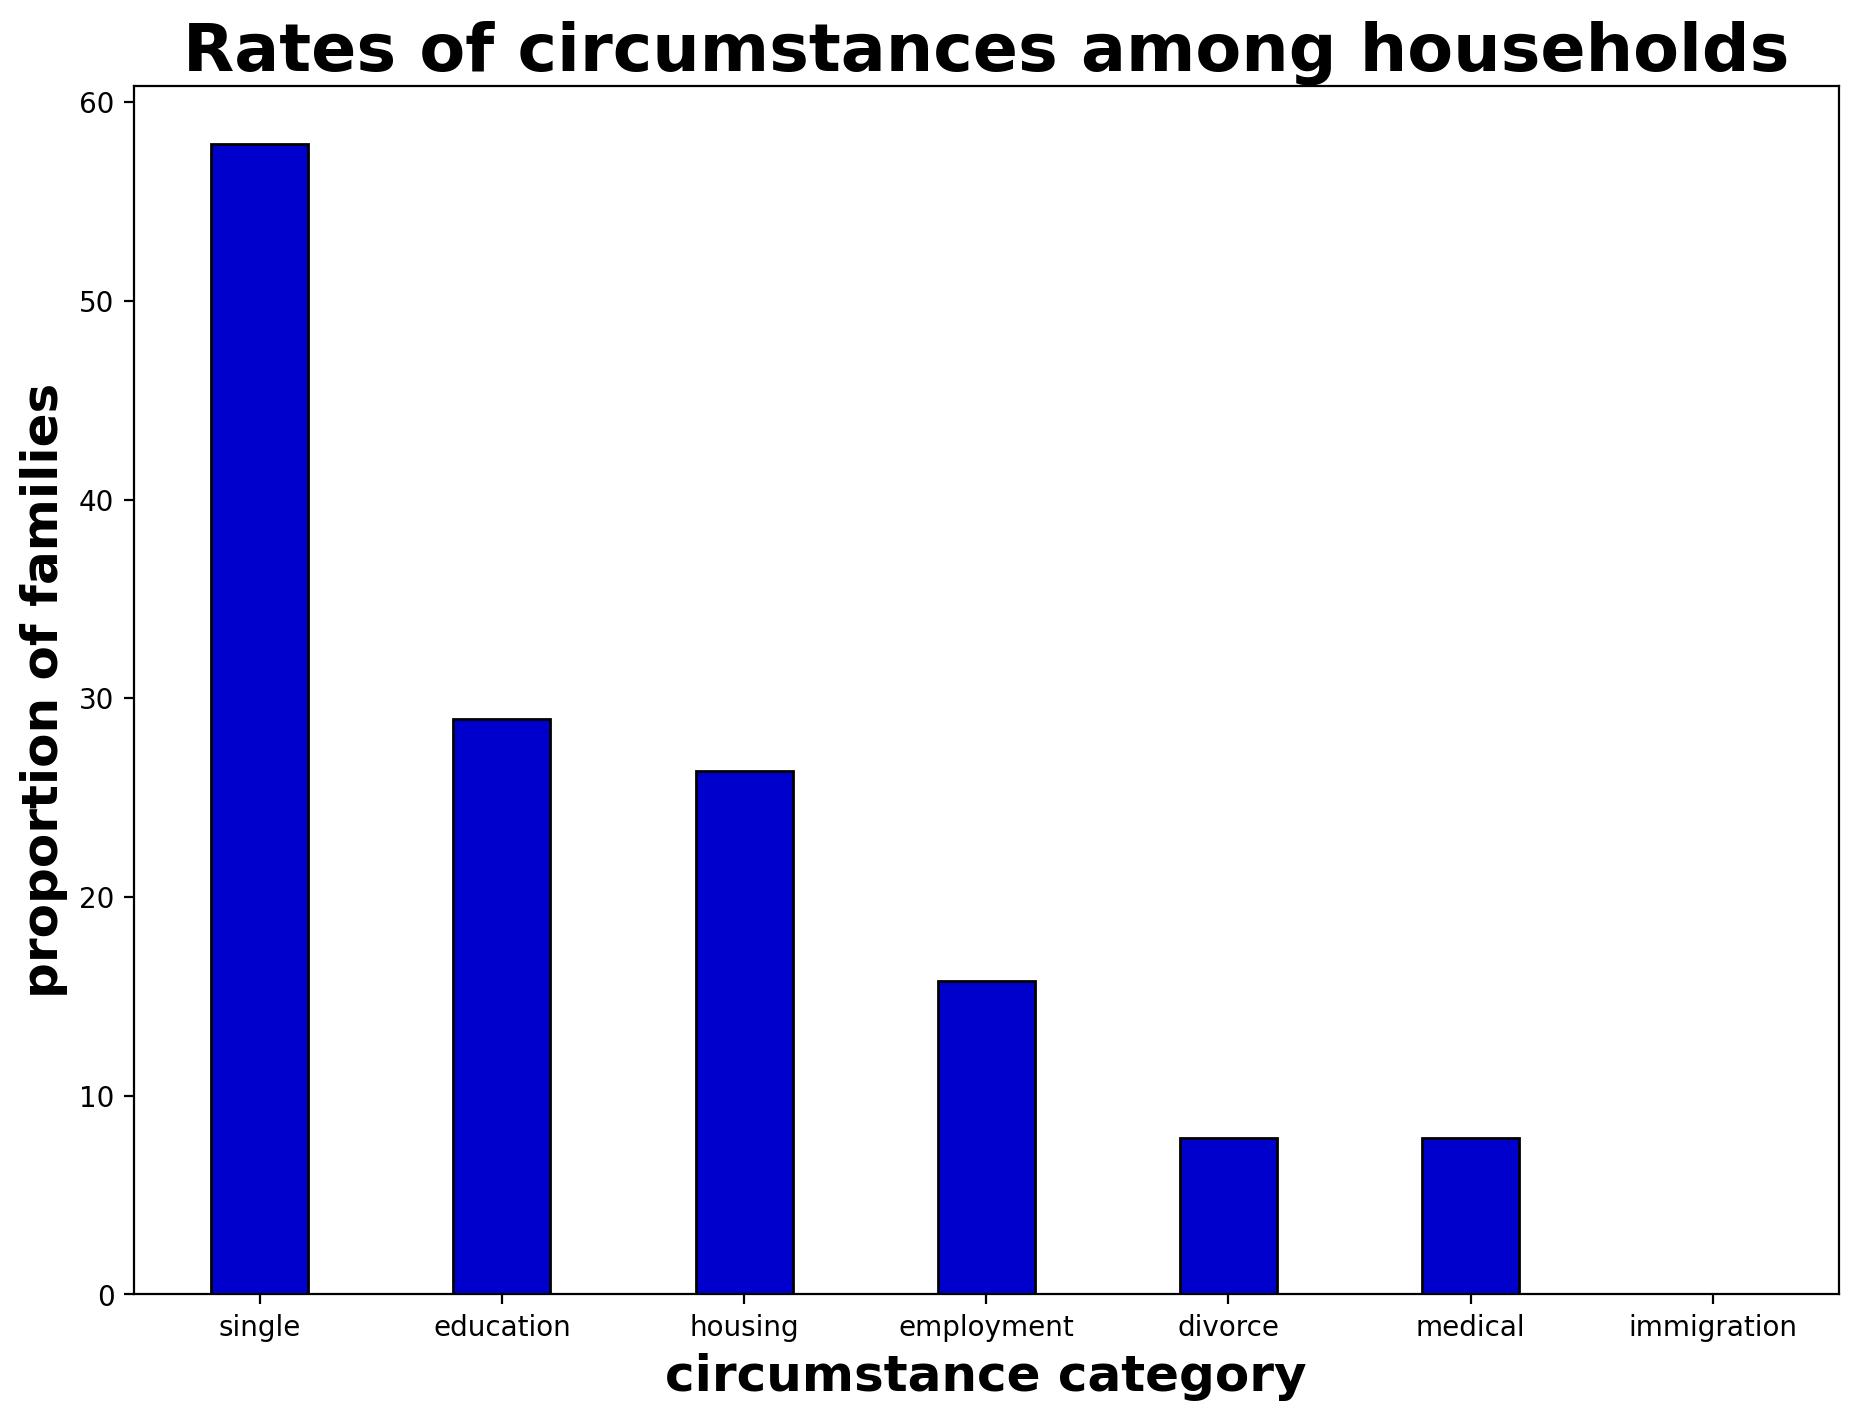

In [7]:
#table for barplot
df = pd.DataFrame()
df['Sum']=real_data.iloc[:,4:11].sum(axis=0)
df['Proportion'] = round((df['Sum']/(len(real_data))*100), 2)
df = df.rename_axis('Type').reset_index().sort_values(by = 'Proportion', ascending = False)
print(df)

plt.figure(figsize=(11,8))

# creating the bar plot
plt.bar(df['Type'], df['Proportion'], color ='mediumblue', edgecolor = 'black',
        width = 0.4)
 
plt.xlabel("circumstance category", size = 18, fontweight = 'bold')
plt.ylabel("proportion of families", size = 18, fontweight = 'bold')
plt.title("Rates of circumstances among households", size = 24, fontweight = 'bold')
plt.show()

**Summary**
<br>Approximately 58% of households are led by a single parent. Education expenses are the most common circumstance requiring additional income, followed closely by housing.

## 2c. boxplots comparing household incomes and estimated financial need per household<a id='group_box'></a>
**How does familys'overall calculated financial need, including coverage of circumstances, compare to household income? What is the spread of these data; is there great disparity in the participant pool?**

/var/folders/bv/4mctz8d94zx0nlh0hjsm4x8h0000gn/T/ipykernel_79124/3007287832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['Income Type'] = 'actual income'
/var/folders/bv/4mctz8d94zx0nlh0hjsm4x8h0000gn/T/ipykernel_79124/3007287832.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  need['Income Type'] = 'needed income'
/var/folders/bv/4mctz8d94zx0nlh0hjsm4x8h0000gn/T/ipykernel_79124/3007287832.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

<Figure size 2200x1600 with 0 Axes>

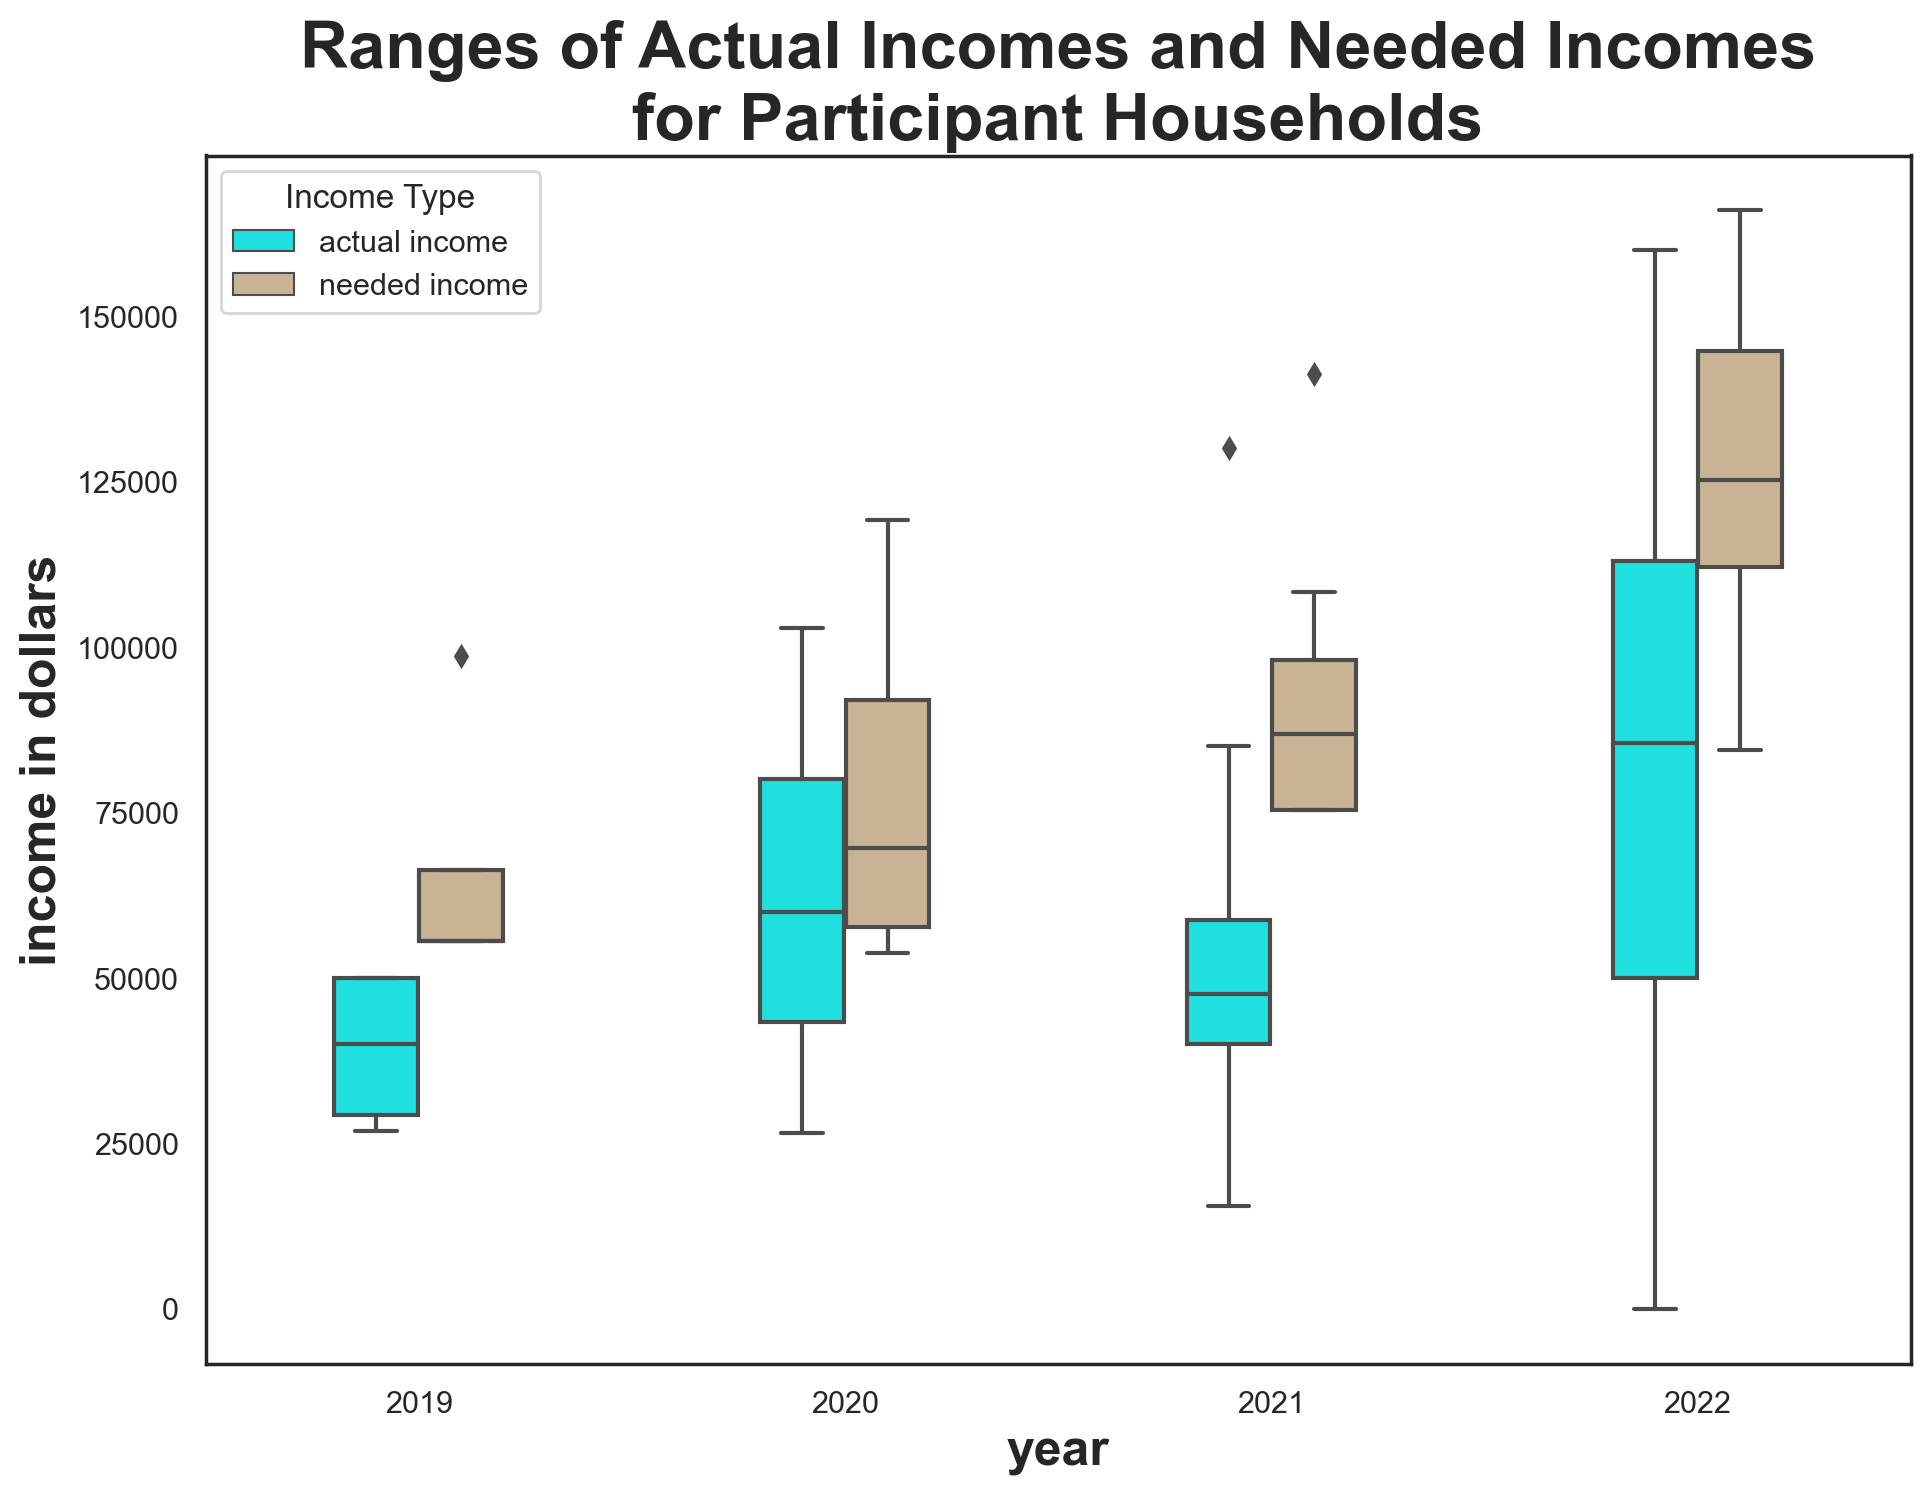

In [8]:
#create table for plot
house = real_data[['household_income', 'year']]
house['Income Type'] = 'actual income'
house = house.rename(columns={"household_income": "income"})
need = real_data[['family_need_income', 'year']]
need['Income Type'] = 'needed income'
need = need.rename(columns={"family_need_income": "income"})

inc_types = house.append(need, ignore_index=True)
#print(inc_types)

# creat grouped boxplot chart of hosehold incomes compared to needed incomes
sns.set_theme(style="white")
sns.despine(offset=10)

plt.figure(figsize=(11,8))

# Draw a nested boxplot to show bills by day and time
plot = sns.boxplot(x="year", y="income",
            hue="Income Type", palette=["aqua", "tan"], width=0.4,
            data=inc_types)

plt.xlabel("year", size = 18, fontweight = 'bold')
plt.ylabel("income in dollars", size = 18, fontweight = 'bold')
plt.title("Ranges of Actual Incomes and Needed Incomes\nfor Participant Households", size = 24, fontweight = 'bold')
plt.show()



## 2d. Histogram displaying participant numbers for binned disposable income ranges<a id='disposable'></a>
**What proportion of applicants might be expected to get the highest tier of funding because their household disposable income is below zero?**

In [9]:
no_disp_inc = real_data[real_data['disposable_income'] <= 0]
has_disp_inc = real_data[real_data['disposable_income'] > 0]

prop_no_disp = ((len(no_disp_inc))/(len(no_disp_inc)+len(has_disp_inc)))*100
print(round(prop_no_disp, 2), ' percent of households have no disposable income and would receive 90 percent funding')


76.32  percent of households have no disposable income and would receive 90 percent funding


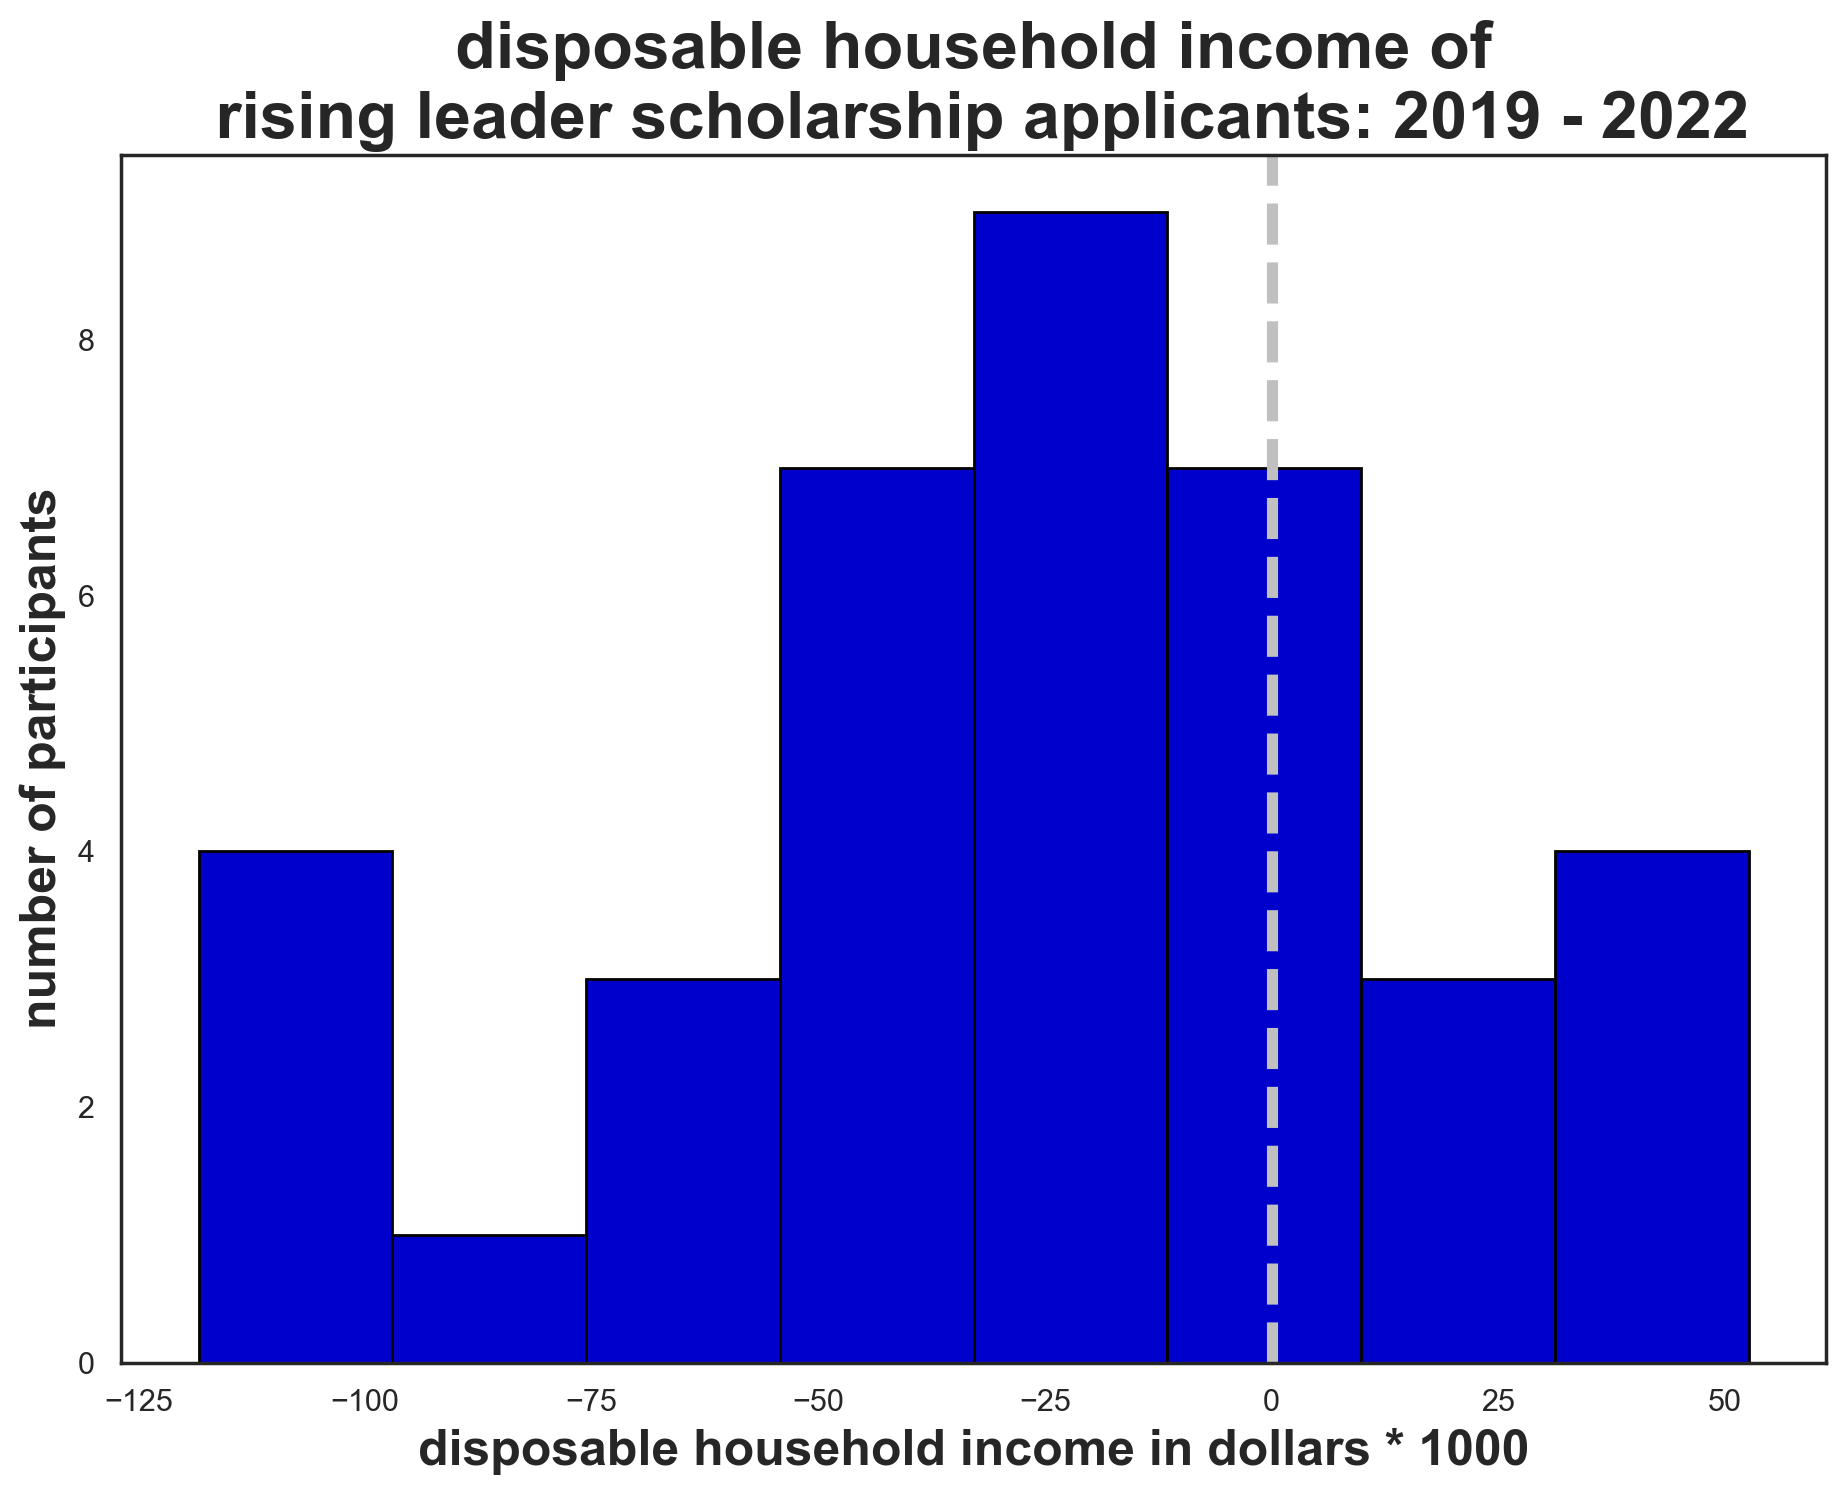

In [10]:
#histogram of disposable incomes

plt.figure(figsize=(11,8))

plt.axvline(0, color='silver', linestyle='--', linewidth = 4)
plt.hist(real_data['disposable_income']/1000, color='mediumblue', edgecolor='black', bins=8)

plt.xlabel('disposable household income in dollars * 1000', size = 18, fontweight = 'bold')
plt.ylabel('number of participants', size = 18, fontweight = 'bold')
plt.title('disposable household income of\n rising leader scholarship applicants: 2019 - 2022', size = 24, fontweight = 'bold')

plt.show()


# 3. Visualizations: Living Wage<a id='viz_wage'></a>
[Back to top](#Guide)

## 3a. average household income<a id='income_line'></a>

In [11]:
#living_wage_table.head(20)

2019 :  39.2
2020 :  61.81514285714286
2021 :  56.943625
2022 :  86.5
[39.2, 61.81514285714286, 56.943625, 86.5]


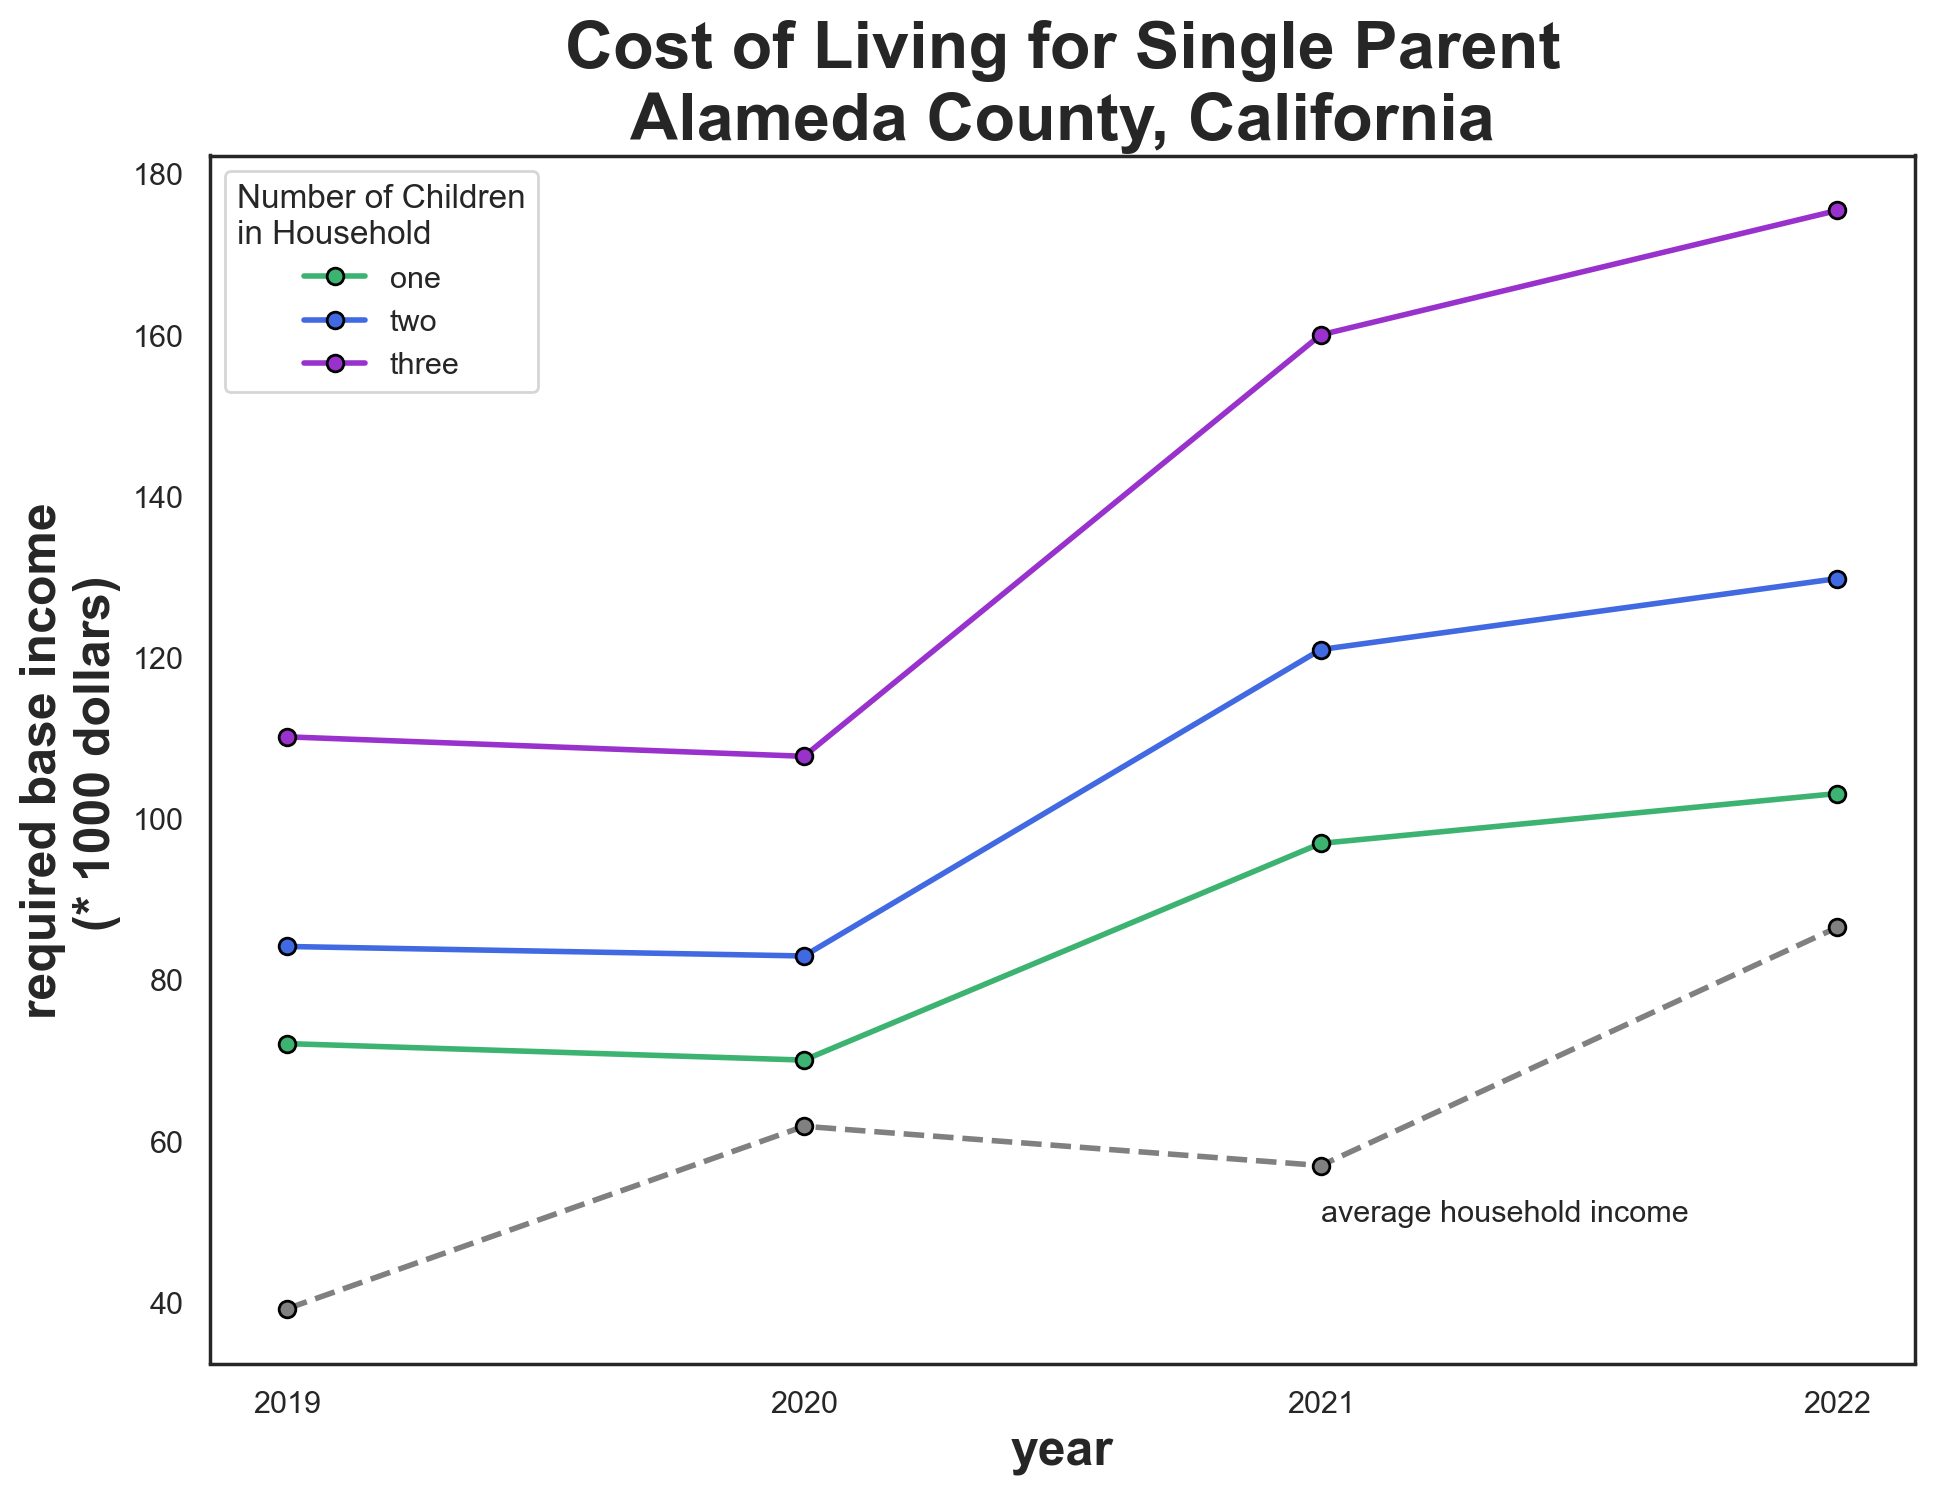

In [12]:
#create an average household income vector for line4
years = [2019, 2020, 2021, 2022]
avg_inc_household = []
for y in years:
    data = real_data[real_data['year']==y]
    house_inc = data['household_income']/1000
    avg_inc = sum(house_inc)/len(house_inc)
    avg_inc_household.append(avg_inc)
    print(y, ': ', avg_inc)

print(avg_inc_household)
# calculate income vectors by year for cost of living in alameda county
living_wage_single_parent = living_wage_table[(living_wage_table['num_adults']==1) & (living_wage_table['num_children']>=1)]
living_wage_single_parent = living_wage_single_parent.sort_values(by = 'year')
living_wage_single_parent1 = living_wage_single_parent[living_wage_single_parent['num_children']==1]
living_wage_single_parent2 = living_wage_single_parent[living_wage_single_parent['num_children']==2]
living_wage_single_parent3 = living_wage_single_parent[living_wage_single_parent['num_children']==3]
                                              
# line chart showing change in required base income for single parent and child by year
x = list(living_wage_single_parent['year'].unique())
y1 = (living_wage_single_parent1['req_income_pretax']/1000).values
y2 = (living_wage_single_parent2['req_income_pretax']/1000).values
y3 = (living_wage_single_parent3['req_income_pretax']/1000).values
y4 = avg_inc_household

plt.figure(figsize=(11,8))

# plotting the line 1 points 
plt.plot(x, y1, label = "one", color = 'mediumseagreen', markeredgecolor='black', linewidth=2, linestyle='-', marker ='o')
plt.plot(x, y2, label = "two", color = 'royalblue', markeredgecolor='black', linewidth=2, linestyle='-', marker ='o')
plt.plot(x, y3, label = "three", color = 'darkorchid', markeredgecolor='black', linewidth=2, linestyle='-', marker ='o')
plt.plot(x, y4, label = "", color = 'gray', markeredgecolor='black', linewidth=2, linestyle='--', marker ='o')
plt.text(2021, 50,'average household income', size = 11)
# Set axis labels and ticks
plt.xlabel('year', size = 18, fontweight = 'bold')
plt.xticks([2019, 2020, 2021, 2022], ['2019', '2020', '2021', '2022'], rotation=0) 
plt.ylabel('required base income\n (* 1000 dollars)', size = 18, fontweight = 'bold')
# Set a title 
plt.title('Cost of Living for Single Parent\nAlameda County, California', size = 24, fontweight = 'bold')
# show a legend on the plot
plt.legend(title = 'Number of Children\nin Household')
# Display a figure.
plt.show()


**Summary**
<br>Almost 60 percent of BGS participant families are headed by a single parent. Homes with additional adults require even more income. 

# 4. Calculated costs table<a id='table_costs'></a>
[Back to top](#Guide)

In [13]:
#see table of costs
calculated_costs_table


,year,req_base_income,cost_adult,cost_child,single_parent,circumstance_cost,disposable_unit
0,2019,36331,4544.67,19238.67,5359.00,2000,4000
1,2020,34288,5153.33,19438.00,5035.67,2000,4000
2,2021,45520,5407.00,29891.00,8265.67,3000,6000
3,2022,50463,7671.33,33949.67,7704.67,3000,6000


# 5. Visualizations: fabricated scholarship data<a id='fabricated'></a>
**How do the fabricated data compare to real data?**
<br> Fabricated data uses the 2022 parameters. These data are shifted to a higher income range because cost of living went up. A higher proportion of high earners is added to assess awards that fall between 0 and 90 percent, where most awards for real participants will be at 90 percent.
<br>[Back to top](#Guide)

In [14]:
#check out the fabricated dataset
fabricated_scholarship

,name,applied,year,household_income,number_adults,number_children,additional_expenses,employment,divorce,medical,...,family,circumstance_cost,disposable_unit,extra_cost,single_parent_cost,family_base_income,family_need_income,disposable_income,family_disposable_unit,percent_eligible
0,a,yes,2022,0,1,1,none,0,0,0,...,0,3000.0,6000.0,0.0,7704.67,84412.67,84412.67,-84412.67,9000.0,90
1,b,yes,2022,0,1,1,none,0,0,0,...,0,3000.0,6000.0,0.0,7704.67,84412.67,84412.67,-84412.67,9000.0,90
2,c,yes,2022,0,3,2,none,0,0,0,...,0,3000.0,6000.0,0.0,0.00,133705.00,133705.00,-133705.00,21000.0,90
3,d,yes,2022,0,2,2,none,0,0,0,...,0,3000.0,6000.0,0.0,0.00,126033.67,126033.67,-126033.67,18000.0,90
4,e,yes,2022,10000,1,2,none,0,0,0,...,0,3000.0,6000.0,0.0,15409.34,118362.34,118362.34,-108362.34,15000.0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,vvvv,yes,2022,190000,2,4,"education, medical, housing",0,0,1,...,0,3000.0,6000.0,9000.0,0.00,193933.01,202933.01,-12933.01,30000.0,90
99,wwww,yes,2022,200000,2,1,none,0,0,0,...,0,3000.0,6000.0,0.0,0.00,92084.00,92084.00,107916.00,12000.0,0
100,xxxx,yes,2022,200000,3,2,none,0,0,0,...,0,3000.0,6000.0,0.0,0.00,133705.00,133705.00,66295.00,21000.0,0
101,yyyy,yes,2022,220000,2,4,we have two children in college,0,0,0,...,0,3000.0,6000.0,3000.0,0.00,193933.01,196933.01,23066.99,30000.0,80


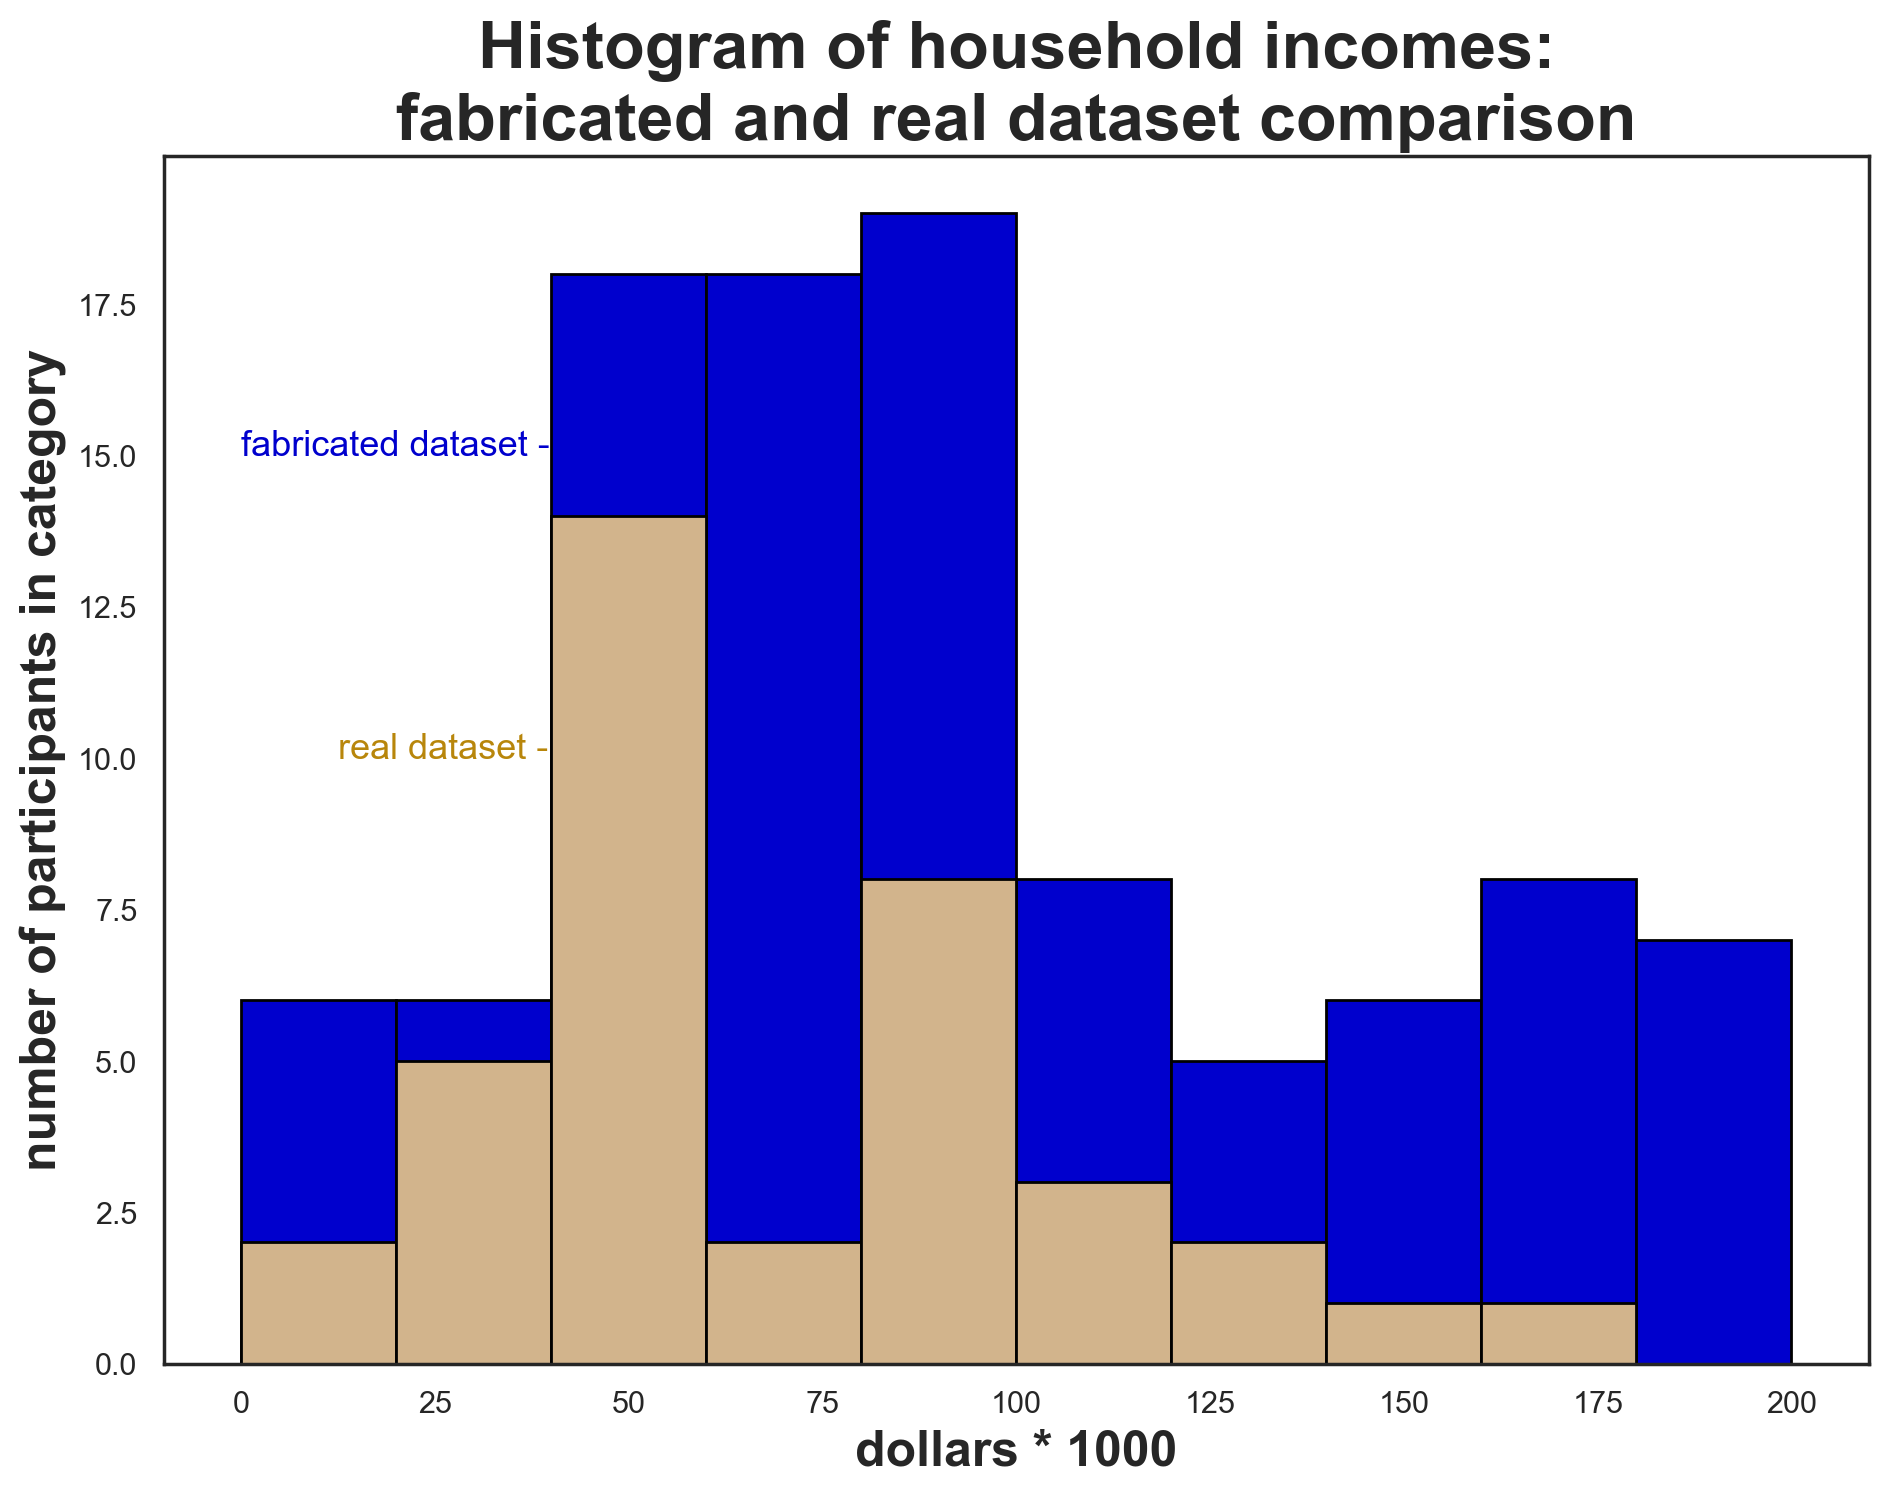

In [15]:
#histograms of real income data and fabricated income data
bin_marks = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

plt.figure(figsize=(11,8))

plt.hist(fabricated_scholarship['household_income']/1000, color='mediumblue', edgecolor='black', bins=bin_marks, alpha=1)
#plt.axvline(fabricated_scholarship['household_income'].mean()/1000, color='black', linestyle='dashed', linewidth=1)
plt.hist(real_data['household_income']/1000, color='tan', edgecolor='black', bins=bin_marks, alpha=1)
#plt.axvline(real_data['household_income'].mean()/1000, color='black', linestyle='dashed', linewidth=1)

plt.xlabel('dollars * 1000', size = 18, fontweight = 'bold')
plt.ylabel('number of participants in category', size = 18, fontweight = 'bold')
plt.title('Histogram of household incomes:\nfabricated and real dataset comparison', size = 24, fontweight = 'bold')

plt.text(0, 15,'fabricated dataset -', size = 13, color = 'mediumblue')
plt.text(12.5, 10,'real dataset -', size = 13, color = 'darkgoldenrod')

plt.show()



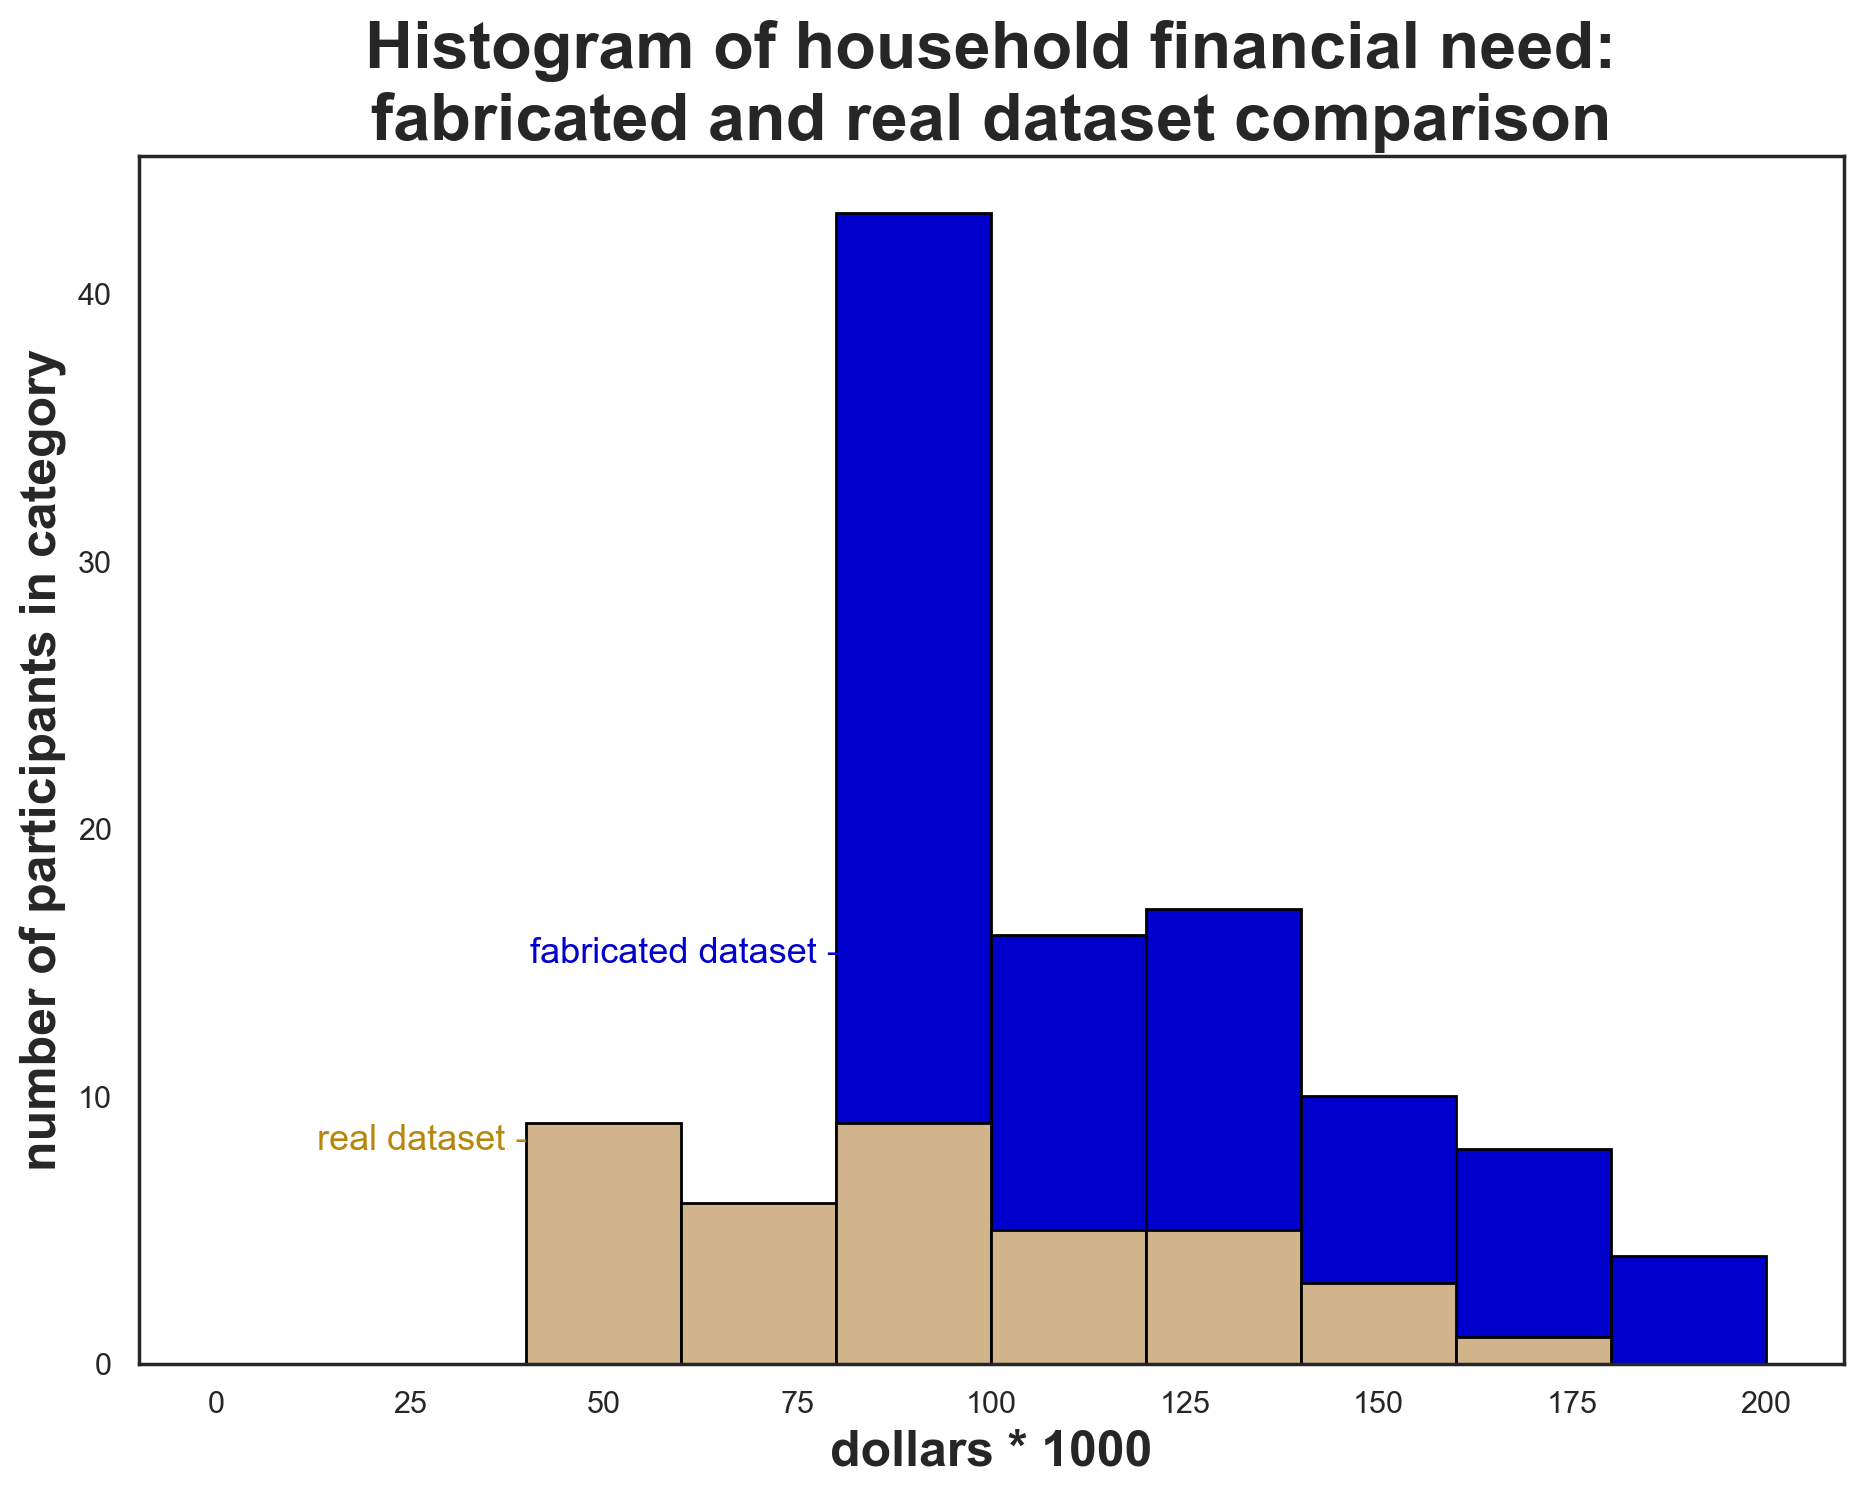

In [16]:
#histograms of real income data and fabricated income data
bin_marks = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

plt.figure(figsize=(11,8))

plt.hist(fabricated_scholarship['family_need_income']/1000, color='mediumblue', edgecolor='black', bins=bin_marks, alpha=1)
#plt.axvline(fabricated_scholarship['family_need_income'].mean()/1000, color='black', linestyle='dashed', linewidth=1)
plt.hist(real_data['family_need_income']/1000, color='tan', edgecolor='black', bins=bin_marks, alpha=1)
#plt.axvline(real_data['family_need_income'].mean()/1000, color='black', linestyle='dashed', linewidth=1)

plt.xlabel('dollars * 1000', size = 18, fontweight = 'bold')
plt.ylabel('number of participants in category', size = 18, fontweight = 'bold')
plt.title('Histogram of household financial need:\nfabricated and real dataset comparison', size = 24, fontweight = 'bold')

plt.text(40.5, 15,'fabricated dataset -', size = 13, color = 'mediumblue')
plt.text(13, 8,'real dataset -', size = 13, color = 'darkgoldenrod')

plt.show()



__________________________

# Additional Visualizations
[Back to top](#Guide)

## Household income compared to calculated financial need

In [17]:
income_mean = real_data['household_income'].mean()
print('mean household income 2019 to 2022: ',income_mean)
need_mean = real_data['family_need_income'].mean()
print('mean household income need 2019 to 2022: ', need_mean)
print('mean difference in income and need:', income_mean-need_mean)
print('')
print('on average, applicant households earn $48,473 less per year than they need')

mean household income 2019 to 2022:  66204.23684210527
mean household income need 2019 to 2022:  94218.93
mean difference in income and need: -28014.693157894726

on average, applicant households earn $48,473 less per year than they need


Text(0.5, 1.0, 'household income and need of scholarship applicants\n2019 - 2022')

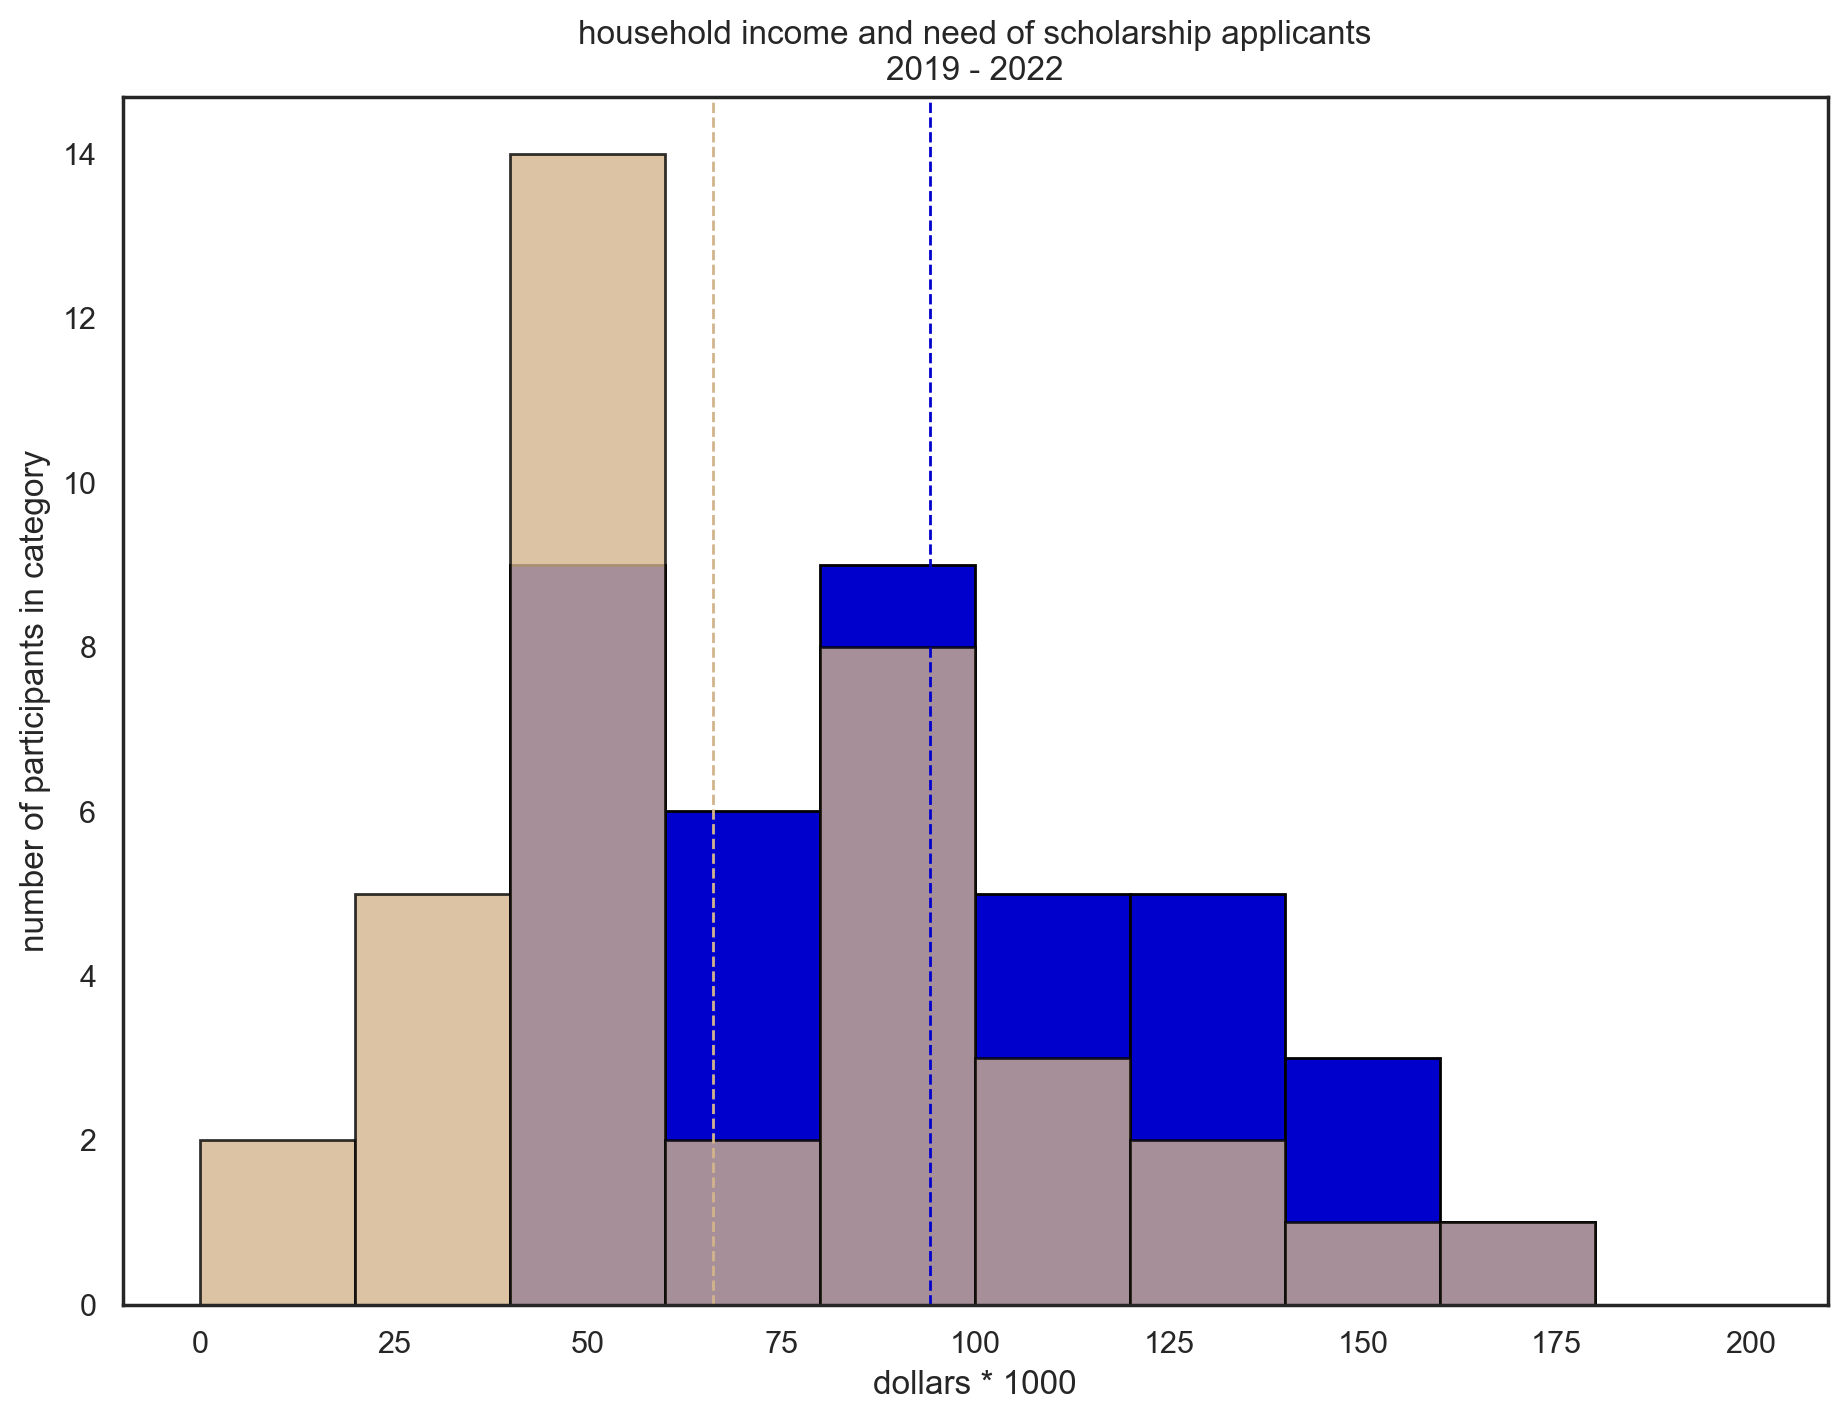

In [18]:
#histograms of income and need
bin_marks = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

plt.figure(figsize=(11,8))

plt.hist(real_data['family_need_income']/1000, color='mediumblue', edgecolor='black', bins=bin_marks, alpha=1)
plt.axvline(real_data['family_need_income'].mean()/1000, color='mediumblue', linestyle='dashed', linewidth=1)
plt.hist(real_data['household_income']/1000, color='tan', edgecolor='black', bins=bin_marks, alpha=.8)
plt.axvline(real_data['household_income'].mean()/1000, color='tan', linestyle='dashed', linewidth=1)

plt.xlabel('dollars * 1000')
plt.ylabel('number of participants in category')
plt.title('household income and need of scholarship applicants\n2019 - 2022')


In [19]:
# Scatterplot - Color Change
#x = real_data['year']
#y1 = real_data['household_income']
#y2= real_data['family_need_income']

# Plot
#plt.scatter(x,y1,facecolors='b', edgecolors='b')
#plt.scatter(x,y2,facecolors='none', edgecolors='r')
#plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

# Decorate
#plt.title('Color Change')
#plt.xlabel('X - value')
#plt.ylabel('Y - value')
#plt.show()